# Exploratory Data Analysis on the HYCB dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data set to a pandas dataframe
HYCB = pd.read_csv('HY_Universe_26k_basicliquidityscoring_INETF.csv')
HYCB.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Industry,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
0,00213MAL8,APXSEC,8/17/2016,12/1/2022,Nan,Nan,B-,Nan,NR,7.875,100000000,CALLABLE,EXCHANGED,Commercial Services,2,0,0,10.822582
1,576485AC0,MTDR,12/9/2016,4/15/2023,Nan,B3,NR,Nan,NR,6.875,175000000,CALLABLE,EXCHANGED,Oil Gas,4,0,0,11.392744
2,18683KAJ0,CLF,3/2/2016,9/30/2020,Nan,WR,NR,Nan,NR,8.000,218545000,CALLABLE,FIXED,Iron/Steel,0,1,0,12.567121
3,172441BA4,CNK,3/21/2016,6/1/2023,Nan,B2,BB,Nan,B+,4.875,225000000,CALLABLE,EXCHANGED,Entertainment,2,2,1,12.536384
4,184496AM9,CLH,3/17/2016,6/1/2021,Nan,Nan,BB+,Nan,NR,5.125,250000000,CALLABLE,EXCHANGED,Environmental Control,3,0,0,11.572853


In [3]:
print('Number of rows of data: ', HYCB.shape[0])
print('Number of columns of data: ', HYCB.shape[1])

Number of rows of data:  1325
Number of columns of data:  18


In [4]:
HYCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 18 columns):
CUSIP                         1325 non-null object
Ticker                        1325 non-null object
Issue Date                    1325 non-null object
Maturity                      1325 non-null object
1st Call Date                 1325 non-null object
Moodys                        1325 non-null object
S_and_P                       1325 non-null object
Fitch                         1325 non-null object
Bloomberg Composite Rating    1325 non-null object
Coupon                        1325 non-null float64
Issued Amount                 1325 non-null int64
Maturity Type                 1325 non-null object
Coupon Type                   1325 non-null object
Industry                      1325 non-null object
Months in JNK                 1325 non-null int64
Months in HYG                 1325 non-null int64
Months in Both                1325 non-null int64
LIQ SCORE                    

In [5]:
# Set CUSIP as the index of the dataframe
HYCB.set_index('CUSIP',inplace=True)
HYCB.head()

,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Industry,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
CUSIP,,,,,,,,,,,,,,,,,
00213MAL8,APXSEC,8/17/2016,12/1/2022,Nan,Nan,B-,Nan,NR,7.875,100000000,CALLABLE,EXCHANGED,Commercial Services,2,0,0,10.822582
576485AC0,MTDR,12/9/2016,4/15/2023,Nan,B3,NR,Nan,NR,6.875,175000000,CALLABLE,EXCHANGED,Oil Gas,4,0,0,11.392744
18683KAJ0,CLF,3/2/2016,9/30/2020,Nan,WR,NR,Nan,NR,8.000,218545000,CALLABLE,FIXED,Iron/Steel,0,1,0,12.567121
172441BA4,CNK,3/21/2016,6/1/2023,Nan,B2,BB,Nan,B+,4.875,225000000,CALLABLE,EXCHANGED,Entertainment,2,2,1,12.536384
184496AM9,CLH,3/17/2016,6/1/2021,Nan,Nan,BB+,Nan,NR,5.125,250000000,CALLABLE,EXCHANGED,Environmental Control,3,0,0,11.572853


In [6]:
# Something about the data
HYCB.describe()

,Coupon,Issued Amount,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
count,1325.000000,1.325000e+03,1325.000000,1325.000000,1325.000000,1325.000000
mean,6.702281,8.468333e+08,15.838491,21.599245,11.756226,17.302374
std,1.912254,5.184617e+08,16.380148,18.525156,15.434352,4.686043
min,1.875000,1.000000e+08,0.000000,0.000000,0.000000,6.926415
25%,5.375000,5.000000e+08,1.000000,5.000000,0.000000,13.887567
50%,6.500000,7.000000e+08,11.000000,17.000000,4.000000,16.449749
75%,7.875000,1.000000e+09,27.000000,35.000000,20.000000,19.771230
max,14.000000,7.364026e+09,64.000000,67.000000,63.000000,37.843738


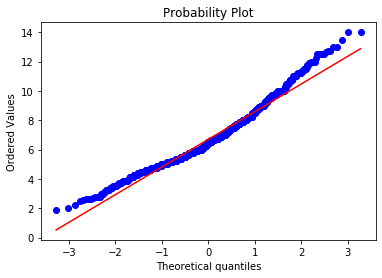

In [7]:
# Q-Q Plot
from scipy import stats
stats.probplot(HYCB.Coupon, dist="norm", plot=plt)
plt.show()

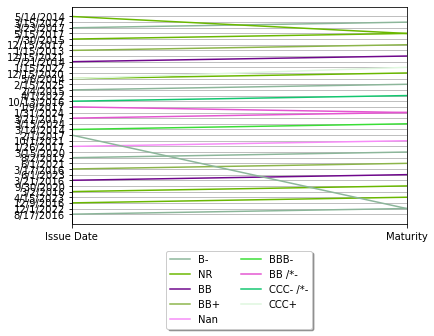

In [8]:
# Parallel Coordinates Plots
from pandas.plotting import parallel_coordinates
features = HYCB[['Issue Date', 'Maturity', 'S_and_P']][:20]

parallel_coordinates(features, 'S_and_P')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1),ncol=2,fancybox=True,shadow=True)
plt.show()

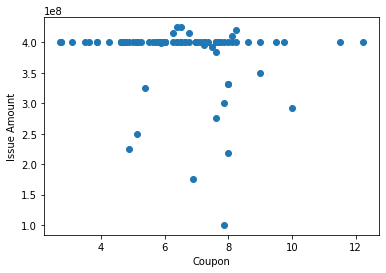

In [9]:
# Correct the code on the book, so it plots columns instead of rows
data1 = HYCB.iloc[:100, 8]
data2 = HYCB.iloc[:100, 9]

plt.xlabel('Coupon')
plt.ylabel('Issue Amount')
plt.scatter(data1, data2)
plt.show()

In [10]:
# Corr between 'Months in HYG' and 'LIQ SCORE'
np.corrcoef(HYCB['Months in HYG'], HYCB['LIQ SCORE'])

array([[1.        , 0.61171004],
       [0.61171004, 1.        ]])

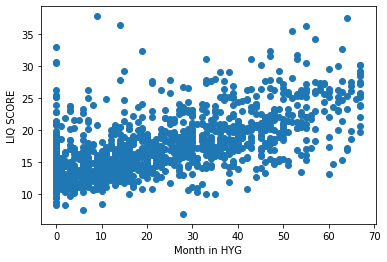

In [11]:
plt.scatter(HYCB['Months in HYG'], HYCB['LIQ SCORE'])
plt.xlabel('Month in HYG')
plt.ylabel('LIQ SCORE')
plt.show()

In [12]:
# Correlations
corMat = pd.DataFrame(HYCB.corr())
corMat

,Coupon,Issued Amount,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
Coupon,1.000000,0.092535,0.002079,-0.022577,-0.049530,-0.010168
Issued Amount,0.092535,1.000000,0.152341,0.068130,0.225144,0.275242
Months in JNK,0.002079,0.152341,1.000000,0.373561,0.833771,0.344964
Months in HYG,-0.022577,0.068130,0.373561,1.000000,0.622751,0.611710
Months in Both,-0.049530,0.225144,0.833771,0.622751,1.000000,0.403761
LIQ SCORE,-0.010168,0.275242,0.344964,0.611710,0.403761,1.000000


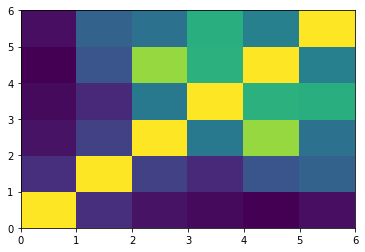

In [13]:
# Heat map
plt.pcolor(corMat)
plt.show()

In [14]:
print("My name is Zizheng Zhang")
print("My NetID is: zizheng2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zizheng Zhang
My NetID is: zizheng2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
